# E‑Commerce EDA — Olist Dataset

This notebook is a polished Exploratory Data Analysis (EDA) designed for a Business Analyst. It loads the preprocessed Olist files from `data/processed/` and produces visuals, KPI boxes, and an insights summary ready to paste into your final report or Power BI narration.

**How to use:** place this notebook in your project root (`ecom-olist-analytics/`) and run all cells. If your `data/processed/` folder is in a different path, update the `PROC` path in the loading cell.

In [7]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import textwrap
sns.set(style='whitegrid')
%matplotlib inline


In [8]:
# Paths - adjust if your structure is different
BASE = Path('../')   # assume notebook is opened from project root
PROC = BASE / 'data' / 'processed'

# Load processed datasets
orders_path = PROC / 'olist_full_orders.csv'
daily_path = PROC / 'daily_revenue.csv'
customers_path = PROC / 'customer_metrics.csv'

print('Looking for files in', PROC.resolve())
for p in [orders_path, daily_path, customers_path]:
    print(p.name, 'exists ->', p.exists())

# Read (with safe parsing)
orders = pd.read_csv(orders_path, low_memory=False, parse_dates=['order_purchase_timestamp'], infer_datetime_format=True)
daily = pd.read_csv(daily_path, parse_dates=['date'], infer_datetime_format=True)
customers = pd.read_csv(customers_path, low_memory=False)
print('\nLoaded: orders={}, daily={}, customers={}'.format(len(orders), len(daily), len(customers)))


Looking for files in E:\ecom-olist-analytics\data\processed
olist_full_orders.csv exists -> True
daily_revenue.csv exists -> True
customer_metrics.csv exists -> True


C:\Users\Avinash Deepak Lakra\AppData\Local\Temp\ipykernel_22124\661987036.py:15: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  orders = pd.read_csv(orders_path, low_memory=False, parse_dates=['order_purchase_timestamp'], infer_datetime_format=True)



Loaded: orders=118434, daily=634, customers=99441


C:\Users\Avinash Deepak Lakra\AppData\Local\Temp\ipykernel_22124\661987036.py:16: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  daily = pd.read_csv(daily_path, parse_dates=['date'], infer_datetime_format=True)


## 1. Data Overview
Quick preview of main tables and summary statistics.

In [9]:
# Quick previews
display(orders.head(3))
display(daily.head(3))
display(customers.head(3))

print('\nOrders - dtypes:')
print(orders.dtypes)
print('\nDaily revenue - dtypes:')
print(daily.dtypes)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,revenue,delivery_days,delay_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,38.71,8.0,-8.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,38.71,8.0,-8.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,38.71,8.0,-8.0


,date,total_revenue,orders_count,avg_order_value
0,2016-09-04,136.23,1,68.115
1,2016-09-05,75.06,1,75.060
2,2016-09-13,0.00,1,0.000


,customer_id,orders_count,total_spent,last_order,recency_days
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,2017-11-14 16:08:26,2921
1,000161a058600d5901f007fab4c27140,1,67.41,2017-07-16 09:40:32,3042
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,2017-02-28 11:06:43,3180



Orders - dtypes:
order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                        object
order_delivered_carrier_date             object
order_delivered_customer_date            object
order_estimated_delivery_date            object
order_item_id                           float64
product_id                               object
seller_id                                object
shipping_limit_date                      object
price                                   float64
freight_value                           float64
payment_sequential                      float64
payment_type                             object
payment_installments                    float64
payment_value                           float64
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city         

## 2. Sales Trend & Seasonality
Daily and monthly trends to understand revenue behaviour.

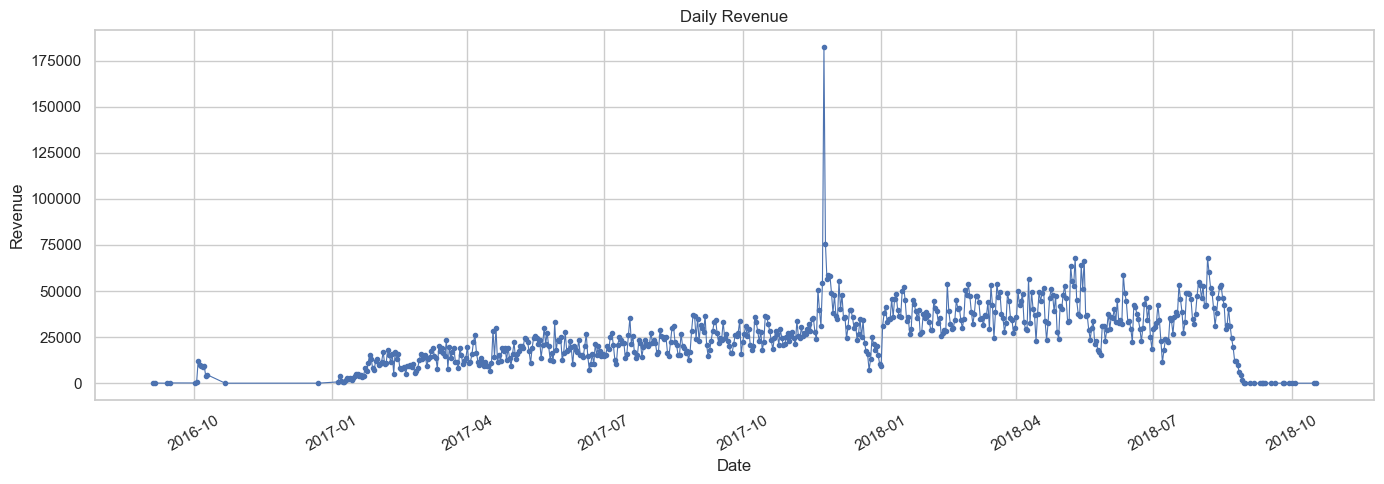

In [10]:
# Daily revenue trend
plt.figure(figsize=(14,5))
plt.plot(daily['date'], daily['total_revenue'], marker='o', linewidth=0.8, markersize=3)
plt.title('Daily Revenue')
plt.xlabel('Date'); plt.ylabel('Revenue')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


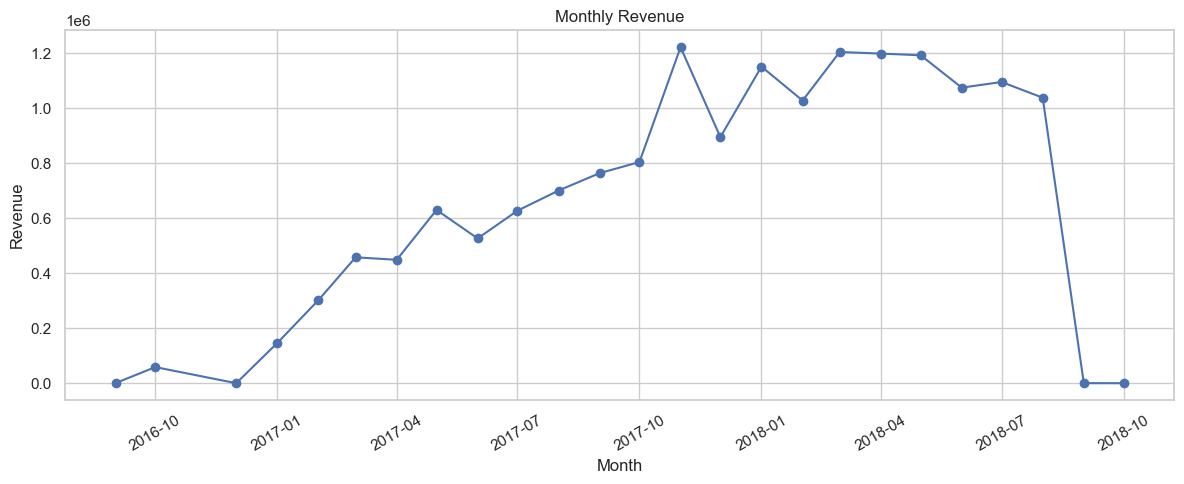

In [11]:
# Monthly aggregation
orders['month'] = orders['order_purchase_timestamp'].dt.to_period('M')
monthly = orders.groupby('month').agg(total_revenue=('revenue','sum'), orders_count=('order_id','nunique')).reset_index()
monthly['month'] = monthly['month'].dt.to_timestamp()

plt.figure(figsize=(12,5))
plt.plot(monthly['month'], monthly['total_revenue'], marker='o')
plt.title('Monthly Revenue')
plt.xlabel('Month'); plt.ylabel('Revenue')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


## 3. Product & Category Performance

C:\Users\Avinash Deepak Lakra\AppData\Local\Temp\ipykernel_22124\1704100294.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cat.values, y=top_cat.index, palette='viridis')


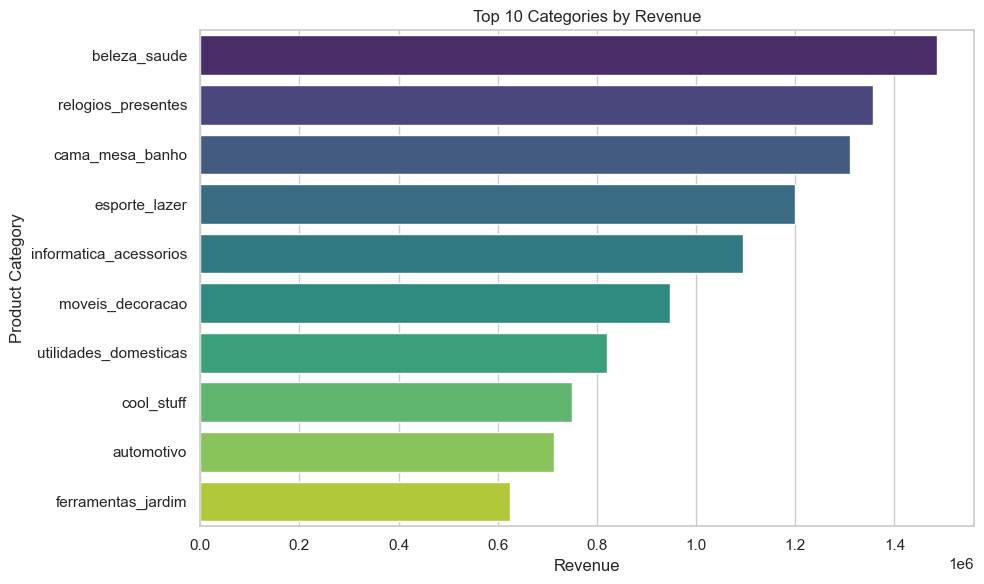

In [12]:
# Top 10 categories by revenue
top_cat = orders.groupby('product_category_name')['revenue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_cat.values, y=top_cat.index, palette='viridis')
plt.title('Top 10 Categories by Revenue')
plt.xlabel('Revenue'); plt.ylabel('Product Category')
plt.tight_layout()
plt.show()


## 4. Delivery Performance (critical for operations)

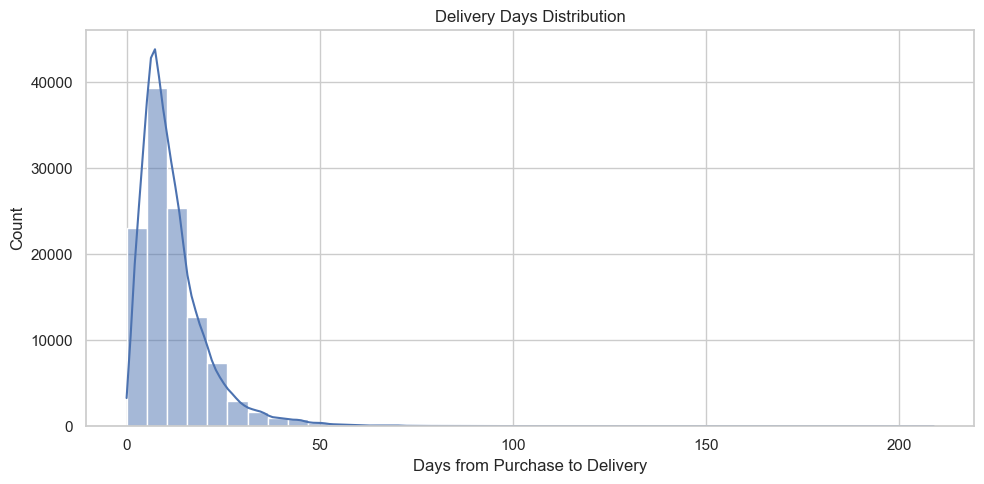

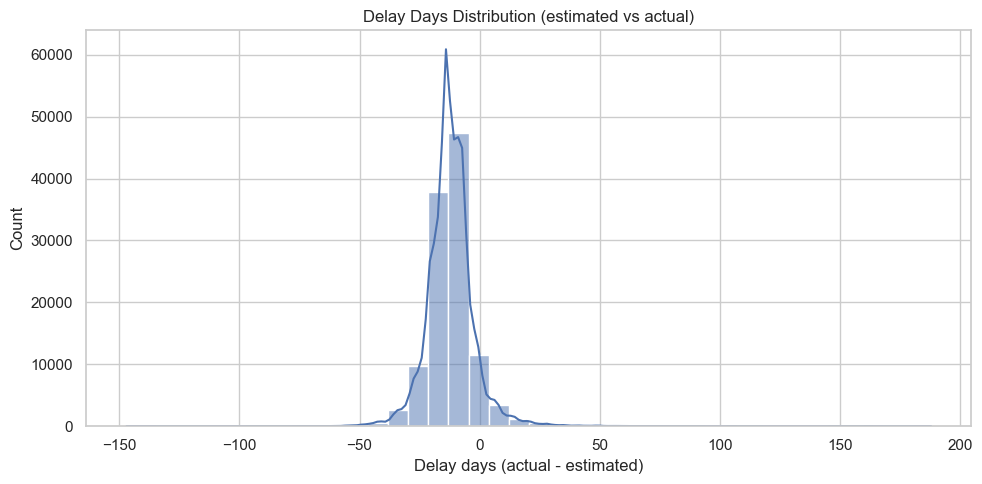

In [13]:
# Delivery days distribution
plt.figure(figsize=(10,5))
sns.histplot(orders['delivery_days'].dropna(), bins=40, kde=True)
plt.title('Delivery Days Distribution')
plt.xlabel('Days from Purchase to Delivery')
plt.tight_layout()
plt.show()

# Delay days (estimated vs actual)
plt.figure(figsize=(10,5))
sns.histplot(orders['delay_days'].dropna(), bins=40, kde=True)
plt.title('Delay Days Distribution (estimated vs actual)')
plt.xlabel('Delay days (actual - estimated)')
plt.tight_layout()
plt.show()


## 5. Customer Analytics (RFM-like)

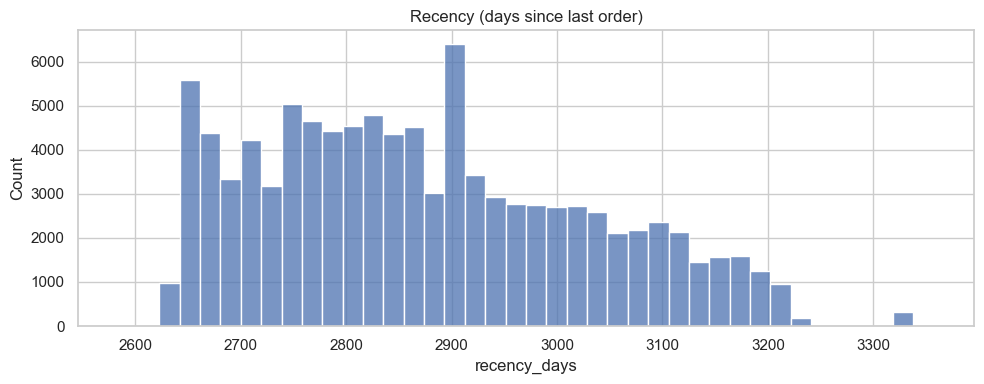

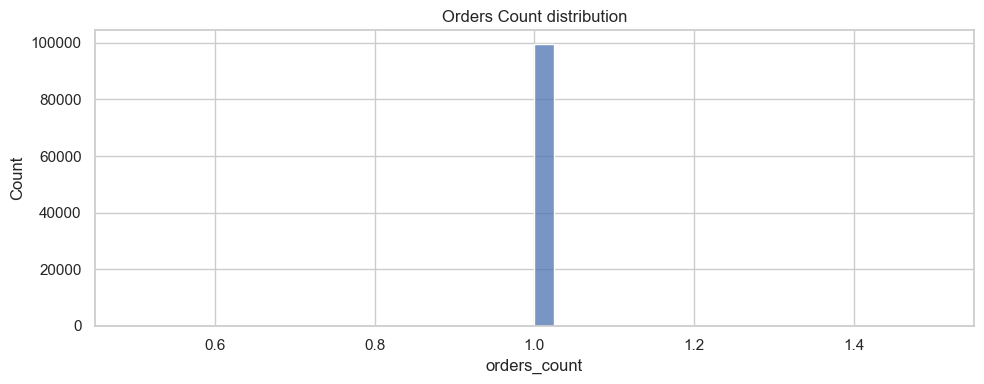

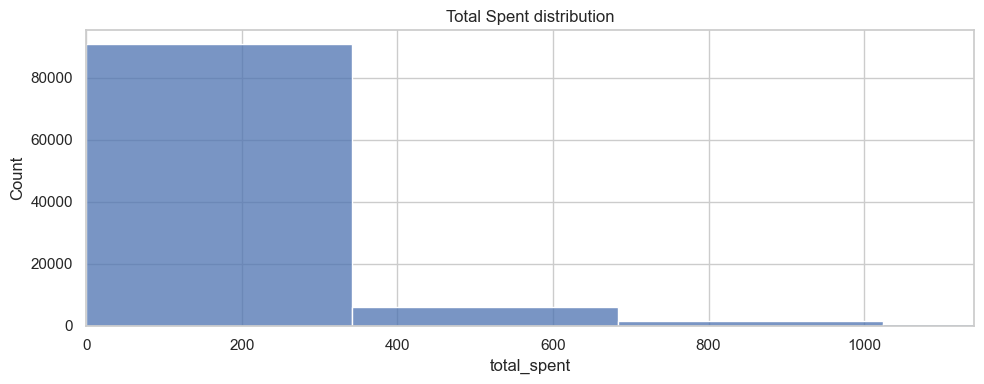

In [14]:
# RFM attributes and distributions
plt.figure(figsize=(10,4))
sns.histplot(customers['recency_days'].dropna(), bins=40)
plt.title('Recency (days since last order)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
sns.histplot(customers['orders_count'].dropna(), bins=40)
plt.title('Orders Count distribution')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
sns.histplot(customers['total_spent'].dropna(), bins=40)
plt.title('Total Spent distribution')
plt.xlim(0, customers['total_spent'].quantile(0.99))  # cap for visualization
plt.tight_layout()
plt.show()


## 6. Payment Methods & Order Types

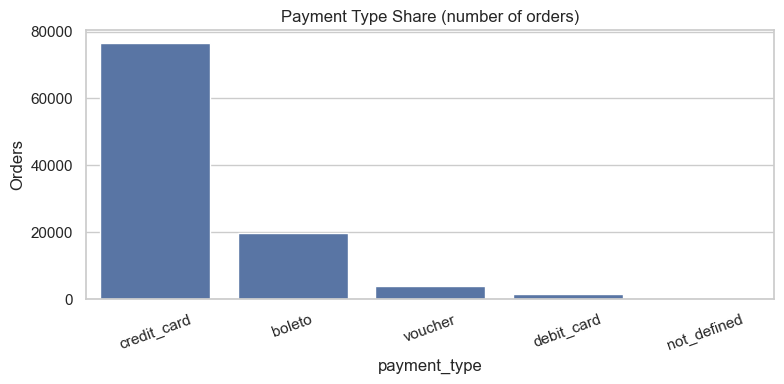

In [15]:
# Payment types share (if present in merged orders)
if 'payment_type' in orders.columns:
    pay = orders.groupby('payment_type')['order_id'].nunique().sort_values(ascending=False)
    plt.figure(figsize=(8,4))
    sns.barplot(x=pay.index, y=pay.values)
    plt.title('Payment Type Share (number of orders)')
    plt.ylabel('Orders')
    plt.xticks(rotation=20)
    plt.tight_layout()
    plt.show()
else:
    print('payment_type column not found in orders. If you need, load original payments file separately.')


## 7. Geography: Sales by State

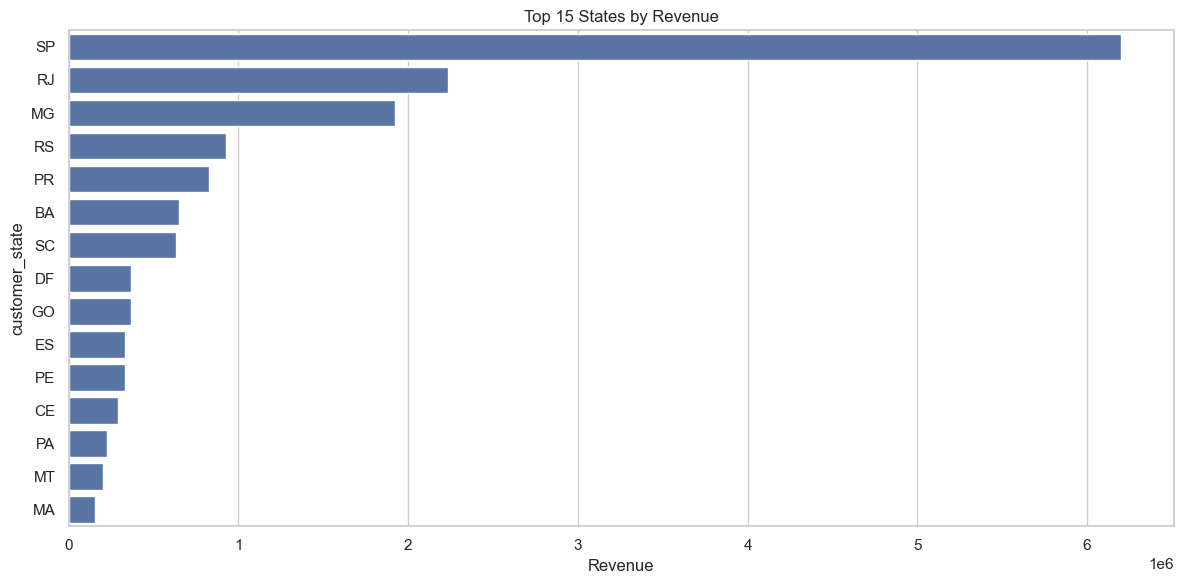

In [16]:
# Sales by customer_state (top 15)
if 'customer_state' in orders.columns:
    state_rev = orders.groupby('customer_state')['revenue'].sum().sort_values(ascending=False).head(15)
    plt.figure(figsize=(12,6))
    sns.barplot(x=state_rev.values, y=state_rev.index)
    plt.title('Top 15 States by Revenue')
    plt.xlabel('Revenue')
    plt.tight_layout()
    plt.show()
else:
    print('customer_state not in orders. Ensure customer merge included geolocation.')


## 8. KPI Summary (Business Analyst-ready)

In [17]:
# KPI calculations
total_revenue = daily['total_revenue'].sum()
total_orders = daily['orders_count'].sum()
aov = total_revenue / max(total_orders,1)
avg_delivery = orders['delivery_days'].dropna().mean()

kpis = {
    'Total Revenue': total_revenue,
    'Total Orders': total_orders,
    'AOV': aov,
    'Avg Delivery (days)': avg_delivery,
    'Unique Customers': customers['customer_id'].nunique()
}

from IPython.display import Markdown, display
display(Markdown('### Key Business KPIs'))
for k,v in kpis.items():
    display(Markdown(f"- **{k}**: `{v:,.2f}`" if isinstance(v, (int,float)) else f"- **{k}**: {v}"))


### Key Business KPIs

- **Total Revenue**: `16,566,687.31`

- **Total Orders**: 99441

- **AOV**: `166.60`

- **Avg Delivery (days)**: `12.02`

- **Unique Customers**: `99,441.00`

## 9. Business Insights & Recommendations

Below are example insights you can copy into your executive summary or slide deck. After running the notebook, update these bullets with actual numbers and observations.

### Example Insights (edit after running):

1. **Top revenue drivers**: `Top category` contributes X% of total revenue — consider promotional campaigns for top categories and cross-sell opportunities.

2. **Seasonality**: There is a clear monthly/weekly pattern with peaks in [months], indicating promotional/holiday impact. Use this to plan inventory and marketing spend.

3. **Delivery performance**: Average delivery time is Y days, with Z% of orders delayed beyond estimated date. Operational focus on logistics partners is advised.

4. **Customer segments**: Top 10% of customers account for P% of revenue — create loyalty programs focused on these cohorts.

5. **Payment behavior**: Payment type distribution shows high usage of [type]. Consider payment offers or installments to increase conversion.

### Recommended next analyses:
- Build RFM-based segments and map marketing strategies to each segment.
- Forecast next 30 days revenue and compare multiple models (SARIMA, Prophet, LSTM).
- Build a churn prediction and target retention campaigns for high churn-risk customers.
